In [1]:
import os
from collections import OrderedDict
import sys
import copy

from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.utils import make_grid

sys.path.insert(0,'..')

from src.models.model_helpers import initialize_model
from src.models.data_helpers import load_data, imshow
from src.models.train_model import train_model
from src.models.predict_model import test, predict

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

%matplotlib inline

In [2]:
data_dir = '../data/raw/airlinersnet/'
batch_size = 32
n_epochs = 50
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [3]:
dataloaders, dataset_sizes, datasets = load_data(data_dir, batch_size)

In [4]:
import json
with open("../src/data/airlinersnet_mapping.json","r") as f:
    cat_to_name = json.load(f)

class_names = [cat_to_name[x] for x in datasets['train'].classes]

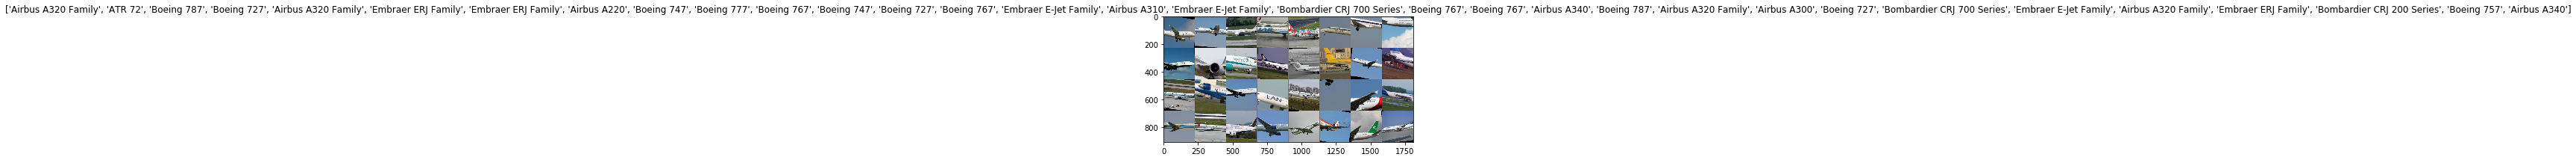

In [5]:
# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [6]:
model_transfer = initialize_model("densenet161", 1024, datasets['train'].class_to_idx, dropout=0.4)

losses = {'train': [],
          'valid': []}
acc = copy.deepcopy(losses)

Sequential(
  (fc1): Linear(in_features=2208, out_features=1024, bias=True)
  (relu1): ReLU()
  (drop1): Dropout(p=0.4, inplace=False)
  (fc2): Linear(in_features=1024, out_features=24, bias=True)
  (output): LogSoftmax()
)


In [8]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model_transfer.classifier.parameters(), lr=0.001)

In [9]:
model_transfer = train_model(model_transfer, optimizer, losses, acc, dataloaders, criterion, n_epochs, device)


Steps:   0%|                                                                                   | 0/352 [00:00<?, ?it/s]

--------
Epoch: 1/50..  Training Loss: 2.656..  Training Accuracy: 0.202..  Validation Loss: 2.236..  Validation Accuracy: 0.321


Steps:   0%|                                                                                   | 0/352 [00:00<?, ?it/s]

--------
Epoch: 2/50..  Training Loss: 2.225..  Training Accuracy: 0.317..  Validation Loss: 1.942..  Validation Accuracy: 0.393


Steps:   0%|                                                                                   | 0/352 [00:00<?, ?it/s]

--------
Epoch: 3/50..  Training Loss: 2.060..  Training Accuracy: 0.362..  Validation Loss: 1.685..  Validation Accuracy: 0.460


Steps:   0%|                                                                                   | 0/352 [00:00<?, ?it/s]

--------
Epoch: 4/50..  Training Loss: 1.994..  Training Accuracy: 0.384..  Validation Loss: 1.704..  Validation Accuracy: 0.451


Steps:  76%|████████████████████████████████████▍           | 267/352 [01:22<00:22,  3.85it/s, Phase=train, Loss=1.966]

KeyboardInterrupt: 

In [ ]:
# model_transfer.load_state_dict(torch.load('model_densenet_sgd_50_airlinersnet.pt'))

In [ ]:
test(dataloaders, model_transfer, criterion_transfer, use_cuda)

In [14]:
def predict_aircraft(img_path):
    idx = predict(img_path, model_transfer)
    return class_names[idx]

In [15]:
def plot_image(img_path):
    img = cv2.imread(img_path)
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb)
    plt.axis('off')
    plt.show()

def caption_images(img_path):
    print(f"This looks like a: {predict_aircraft(img_path)}")
    plot_image(img_path)
    

In [16]:
from glob import glob
import numpy as np
import random
import cv2

In [50]:
extra_test_img_dir = glob("../data/processed/test_images/*")

This looks like a: Airbus A350
This looks like a: Airbus A340
This looks like a: Boeing 787


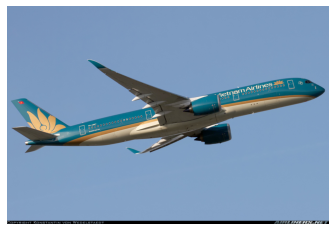

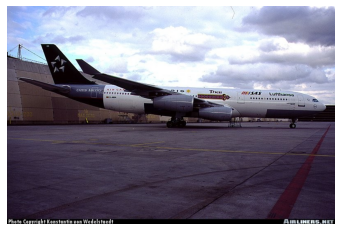

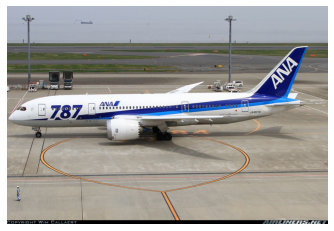

In [56]:
for i in random.sample(list(extra_test_img_dir),3):
    caption_images(i)